In [5]:
import pandas as pd

# Load the data
data = pd.read_csv('superstore.csv', encoding='ISO-8859-1')

# Explore the data
print(data.head())
print(data.info())

# Handle missing values
data.dropna(inplace=True)

# Remove duplicates
data.drop_duplicates(inplace=True)

# Convert data types if necessary
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

# Create new features
data['TotalSales'] = data['Quantity'] * data['Sales']


   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

In [6]:
from sqlalchemy import create_engine

# Create SQLite engine
engine = create_engine('sqlite:///retail_sales.db')

# Load data into SQL database
data.to_sql('sales', engine, index=False, if_exists='replace')


9994

C:\Users\nithi\AppData\Local\Temp\ipykernel_15184\4280834517.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data.set_index('Order Date')['TotalSales'].resample('M').sum().plot()


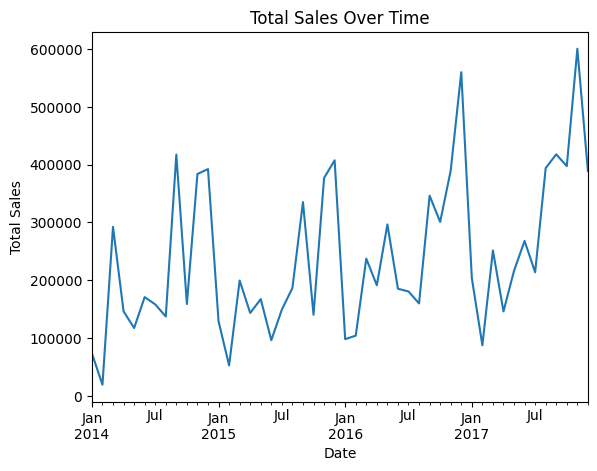

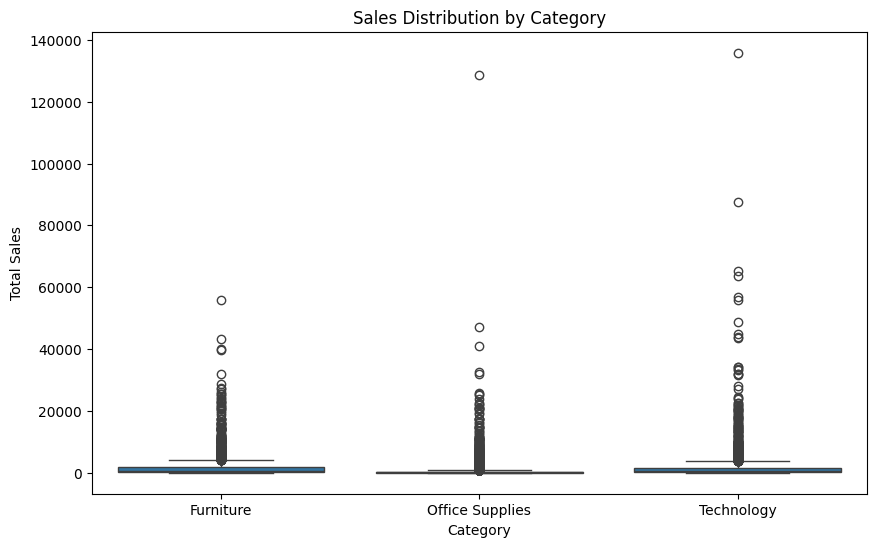

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot total sales over time
data.set_index('Order Date')['TotalSales'].resample('M').sum().plot()
plt.title('Total Sales Over Time')
plt.ylabel('Total Sales')
plt.xlabel('Date')
plt.show()

# Sales distribution by category
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='TotalSales', data=data)
plt.title('Sales Distribution by Category')
plt.ylabel('Total Sales')
plt.xlabel('Category')
plt.show()

